In [1]:
# We import the necessary modules

import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("Coachella-2015-2-DFE.csv", encoding = 'latin')
df = df[['coachella_sentiment','text']]
df = df[df.coachella_sentiment != 'cant tell']
df.head()

,coachella_sentiment,text
0,positive,#Coachella2015 tickets selling out in less tha...
1,positive,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...
2,positive,#Coachella2015 #VIP passes secured! See you th...
3,positive,PhillyÛªs @warondrugsjams will play #Coachell...
4,positive,If briana and her mom out to #Coachella2015 i...


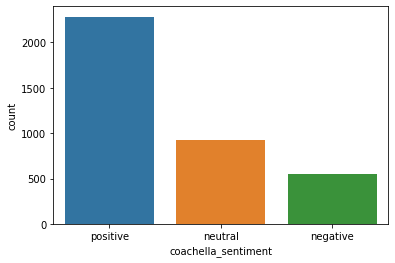

In [2]:
# We inspect a countplot of tweet sentiments which shows our dataset has a significant number of positive examples
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df.coachella_sentiment)
plt.show()

In [3]:
# We assign each sentiment a numerical value

class_names = df.coachella_sentiment.unique()[::-1]

def to_polarity(sentiment):
    if sentiment == class_names[0]:
        return 0
    elif sentiment == class_names[1]:
        return 1
    elif sentiment == class_names[2]:
        return 2

df['polarity'] = df.coachella_sentiment.apply(to_polarity)
df.sample(5,random_state = 14)

,coachella_sentiment,text,polarity
2624,neutral,but I might as well name the best of #Coachell...,1
1487,positive,I'll be having a bit of @coachella on Sunday A...,2
212,positive,Going to #Coachella2015 @coachella,2
1611,positive,@flo_tweet and @MarinasDiamonds lined up for #...,2
3502,negative,Coachella isn't even good enough his year to b...,0


In [4]:
# We define a function that removes any mention of #,@, and RT

import preprocessor as p
import re

def clean_tweet(text):
    p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.NUMBER, p.OPT.SMILEY, p.OPT.RESERVED,p.OPT.MENTION)
    return ' '.join(re.sub("(?<![\w\d])RT(?![\w\d])|([^A-Za-z'.!?])"," ",p.clean(text)).split())

df['clean_text'] = df.text.apply(clean_tweet)
df.clean_text.sample(5,random_state = 14)

2624       but I might as well name the best of Coachella
1487    I'll be having a bit of on Sunday April th! Pl...
212                                    Going to Coachella
1611                           and lined up for Coachella
3502    Coachella isn't even good enough his year to b...
Name: clean_text, dtype: object

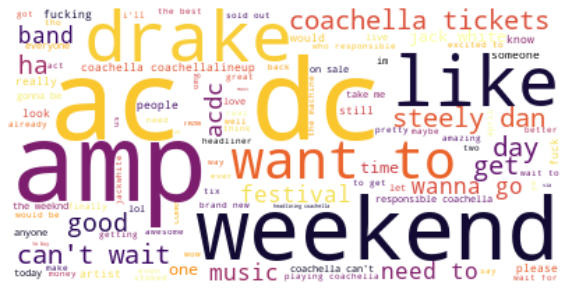

In [6]:
# We inspect a wordcloud with the most common words removed which gives us an idea of popular artists
from wordcloud import WordCloud
from nltk.corpus import stopwords

all_words = " ".join(tweet.lower() for tweet in df.clean_text)
stop_words = set(stopwords.words('english')).union({'coachella','lineup','line','up','go','year','i\'m','going','see','ticket'})
wordcloud = WordCloud(stopwords=stop_words, background_color="white", colormap = 'inferno', max_words = 100).generate(all_words)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [7]:
# Export our cleaned-up dataframe for data pre-processing & modeling.

df.to_csv('clean_coachella.csv')